# DATA SCIENCE JOBS SALARY PREDICTION
The aim is to predict Data Scientist salary based on job descriptions.

The notebook is divided into following parts:
- PART A. DATA COLLECTION
- PART B. DATA CLEANING
- PART C. EXPLORATORY DATA ANALYSIS
- PART D. FEATURE ENGINEERING
- PART E. MODEL BUILDING AND PREDICTING

# PART A. DATA COLLECTION
This article was referenced to obtain data https://towardsdatascience.com/selenium-tutorial-scraping-glassdoor-com-in-10-minutes-3d0915c6d905

In [ ]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd

In [ ]:
def get_jobs(keyword, num_jobs, verbose, path, slp_time):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    #Initializing the webdriver
    options = webdriver.ChromeOptions()
    
    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')
    
    #Change the path to where chromedriver is in your home folder.
    driver = webdriver.Chrome(executable_path=path, options=options)
    driver.set_window_size(1120, 1000)
    
    url = "https://www.glassdoor.com/Job/"+keyword+"-jobs-SRCH_KO0,25.htm"
    #url = "https://www.glassdoor.com/Job/machine-learning-engineer-jobs-SRCH_KO0,25.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword="+keyword+"&sc.keyword="+keyword+"&locT=&locId=&jobType="
    #url = "https://www.glassdoor.co.in/Job/data-science-jobs-SRCH_KO0,12.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword="+keyword+"&sc.keyword="+keyword+"&locT=&locId=&jobType="
    #url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + keyword + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(slp_time)

        #Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(.1)

        try:
            driver.find_element_by_css_selector('[alt="Close"]').click() #clicking to the X.
            print(' x out worked')
        except NoSuchElementException:
            print(' x out failed')
            pass

        
        #Going through each job in this page
        job_buttons = driver.find_elements_by_class_name("jl")  #jl for Job Listing. These are the buttons we're going to click.
        for job_button in job_buttons:  

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break

            job_button.click()  #You might 
            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
                    location = driver.find_element_by_xpath('.//div[@class="location"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(5)

            try:
                salary_estimate = driver.find_element_by_xpath('.//span[@class="gray salary"]').text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element_by_xpath('.//span[@class="rating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            try:
                driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()

                try:
                    #<div class="infoEntity">
                    #    <label>Headquarters</label>
                    #    <span class="value">San Francisco, CA</span>
                    #</div>
                    headquarters = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
                except NoSuchElementException:
                    headquarters = -1

                try:
                    size = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Founded"]//following-sibling::*').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1

                try:
                    competitors = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Competitors"]//following-sibling::*').text
                except NoSuchElementException:
                    competitors = -1

            except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                headquarters = -1
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1
                competitors = -1

                
            if verbose:
                print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,
            "Competitors" : competitors})
            #add job to jobs
            
            
        #Clicking on the "next page" button
        try:
            driver.find_element_by_xpath('.//li[@class="next"]//a').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

    return pd.DataFrame(jobs)  #This line converts the dictionary object into a pandas DataFrame.


In [ ]:
path = r"C:\Users\ravi\Downloads\DS_Jobs\chromedriver.exe"

df = get_jobs('data_scientist',500, False, path, 15)

df.to_csv('data_science_jobs.csv', index = False)

# PART B. DATA CLEANING

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
df=pd.read_csv('data_science_jobs.csv')

In [128]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
Unnamed: 0           956 non-null int64
Job Title            956 non-null object
Salary Estimate      956 non-null object
Job Description      956 non-null object
Rating               956 non-null float64
Company Name         956 non-null object
Location             956 non-null object
Headquarters         956 non-null object
Size                 956 non-null object
Founded              956 non-null int64
Type of ownership    956 non-null object
Industry             956 non-null object
Sector               956 non-null object
Revenue              956 non-null object
Competitors          956 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


### Dropping Unnamed column

In [130]:
df=df.drop(['Unnamed: 0'], axis =1)

### Finding Missing Values
#### Web scrapper has returned '-1' where it could not find relevant values. Let's find out the number of such instances in each column of the data

In [131]:
all_cols=df.columns

In [132]:
for i in range (0,len(all_cols)):
    if all_cols.dtype=='object':
        if '-1' in df[all_cols[i]].value_counts().index:
            print(all_cols[i])
            print(df[all_cols[i]].value_counts()['-1'])
        elif -1 in df[all_cols[i]].value_counts().index:
            print(all_cols[i])
            print(df[all_cols[i]].value_counts()[-1])

Salary Estimate
214
Rating
34
Headquarters
11
Size
11
Founded
97
Type of ownership
11
Industry
39
Sector
39
Revenue
11
Competitors
634


#### So there are total 10 varibles having some missing values. The target variable i.e. 'Salary Estimate' also contains missing values. Therefore removing all such rows from the data.

In [133]:
df = df[df['Salary Estimate']!='-1']

In [134]:
for i in range (0,len(all_cols)):
    if all_cols.dtype=='object':
        if '-1' in df[all_cols[i]].value_counts().index:
            print(all_cols[i])
            print(df[all_cols[i]].value_counts()['-1'])
        elif -1 in df[all_cols[i]].value_counts().index:
            print(all_cols[i])
            print(df[all_cols[i]].value_counts()[-1])

Rating
11
Headquarters
1
Size
1
Founded
50
Type of ownership
1
Industry
10
Sector
10
Revenue
1
Competitors
460


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 14 columns):
Job Title            742 non-null object
Salary Estimate      742 non-null object
Job Description      742 non-null object
Rating               742 non-null float64
Company Name         742 non-null object
Location             742 non-null object
Headquarters         742 non-null object
Size                 742 non-null object
Founded              742 non-null int64
Type of ownership    742 non-null object
Industry             742 non-null object
Sector               742 non-null object
Revenue              742 non-null object
Competitors          742 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 87.0+ KB


#### Now the data size has reduced from 956 to 742 instances

### Cleaning 'Salary Estimate'

In [136]:
df['Salary Estimate'].sample(30)

459              $32K-$59K (Glassdoor est.)
229             $60K-$127K (Glassdoor est.)
494             $93K-$151K (Glassdoor est.)
462            $107K-$173K (Glassdoor est.)
609              $42K-$77K (Glassdoor est.)
635              $57K-$80K (Glassdoor est.)
49             $158K-$211K (Glassdoor est.)
599             $54K-$115K (Glassdoor est.)
787        $10-$17 Per Hour(Glassdoor est.)
623            $107K-$173K (Glassdoor est.)
305             $74K-$126K (Glassdoor est.)
601              $49K-$97K (Glassdoor est.)
705             $86K-$137K (Glassdoor est.)
777            $136K-$208K (Glassdoor est.)
354             $83K-$166K (Glassdoor est.)
625             $89K-$144K (Glassdoor est.)
845             $89K-$144K (Glassdoor est.)
477    Employer Provided Salary:$150K-$160K
276            $132K-$211K (Glassdoor est.)
86              $83K-$137K (Glassdoor est.)
780             $71K-$129K (Glassdoor est.)
789               $82K-$129K(Employer est.)
521             $92K-$146K (Glas

### There are some columns where 'per hour' and 'employer provided salary' is mentioned. Indicating all such values in separate columns

In [137]:
df['per_hour'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['emp_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

### Taking out only numerical salary

In [138]:
sal = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [139]:
sal_numeric = sal.apply(lambda x: x.replace('$','').replace('K',''))

In [140]:
sal_numeric2 = sal_numeric.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

### Creating three separate columns of max, min and average salaries

In [141]:
df['min_sal'] = sal_numeric2.apply(lambda x: int(x.split('-')[0]))
df['max_sal'] = sal_numeric2.apply(lambda x: int(x.split('-')[1]))
df['avg_sal'] = (df['min_sal']+df['max_sal'])/2

### Converting per hour salary into annual salary. Applying thumb rule: Annual salary (in thousands) = per hour salary*2 

In [142]:
df['min_sal'] = df.apply(lambda x: x['min_sal']*2 if x['per_hour'] ==1 else x['min_sal'], axis =1)
df['max_sal'] = df.apply(lambda x: x['max_sal']*2 if x['per_hour'] ==1 else x['max_sal'], axis =1)
df['avg_sal'] = df.apply(lambda x: x['avg_sal']*2 if x['per_hour'] ==1 else x['avg_sal'], axis =1)

### Creating new column indicating age of company

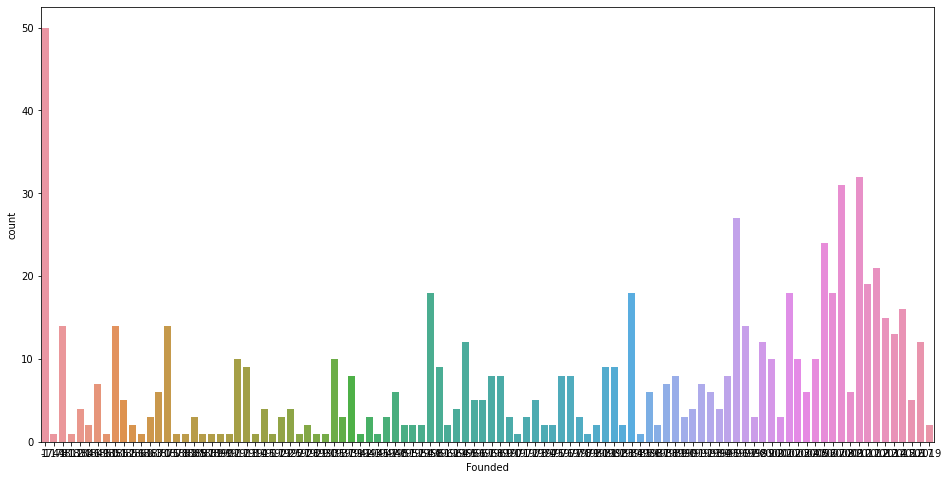

In [79]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Founded')

In [84]:
df.groupby('Founded')['avg_sal'].mean()

Founded
-1       102.470000
 1744    128.000000
 1781    132.285714
 1812    116.500000
 1830     87.500000
            ...    
 2014     94.000000
 2015     94.718750
 2016    122.400000
 2017    117.125000
 2019     83.250000
Name: avg_sal, Length: 102, dtype: float64

In [86]:
df['avg_sal'].mean()

101.43463611859838

In [143]:
df['comp_age'] = df.Founded.apply(lambda x: x if x ==-1 else 2020-x)

### Cleaning company name

In [144]:
df['comp_name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] ==-1 else x['Company Name'][:-4], axis = 1)

In [145]:
df['comp_name'].value_counts()

Reynolds American                  14
MassMutual                         14
Takeda Pharmaceuticals             14
Software Engineering Institute     11
PNNL                               10
                                   ..
KSM Consulting                      1
Edgewell Personal Care              1
Synagro                             1
Carilion Clinic                     1
Scientific Research Corporation     1
Name: comp_name, Length: 343, dtype: int64

### Extracting Job State form Job Location variable

In [146]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])

### If job location is same as company HQ then indicating this in separate column

In [147]:
df['HQ_job'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)

In [148]:
df['HQ_job'].sum()

414

### Extracting Skills required from Job Description in separate columns: Python, SQL, Machine Learning, Statistics, Excel, AWS/Azure, Spark/Hadoop, Tableau/PowerBI, TensorFlow/Pytorch.

In [149]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['python'].value_counts()

1    392
0    350
Name: python, dtype: int64

In [150]:
df['sql'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['sql'].value_counts()

1    380
0    362
Name: sql, dtype: int64

In [151]:
df['ml']=df['Job Description'].apply(lambda x: 1 if 'machine learning' in x.lower() else 0)
df['ml'].value_counts()

0    427
1    315
Name: ml, dtype: int64

In [152]:
df['stat'] = df['Job Description'].apply(lambda x: 1 if 'statistics' in x.lower() or 'statistical' in x.lower() else 0)
df['stat'].value_counts()

1    380
0    362
Name: stat, dtype: int64

In [153]:
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['excel'].value_counts()

1    388
0    354
Name: excel, dtype: int64

In [154]:
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() or 'azure' in x.lower() else 0)
df['aws'].value_counts()

0    555
1    187
Name: aws, dtype: int64

In [155]:
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() or 'hadoop' in x.lower() else 0)
df['spark'].value_counts()

0    541
1    201
Name: spark, dtype: int64

In [156]:
df['tableau']=df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() or 'powerbi' in x.lower() else 0)
df['tableau'].value_counts()

0    589
1    153
Name: tableau, dtype: int64

In [157]:
df['tf'] = df['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() or 'pytorch' in x.lower() else 0)
df['tf'].value_counts()

0    667
1     75
Name: tf, dtype: int64

### Extracting Job_Roles from Job_Title

In [158]:
def role_extract(title):
    if 'director' in title.lower() or 'vp' in title.lower() or 'head' in title.lower():
        return 'director'
    elif 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower() or 'data analytics' in title.lower():
        return 'data analyst'
    elif 'scientist' in title.lower():
        return 'scientist'
    else:
        return 'other'

In [159]:
df['Job_Roles'] = df['Job Title'].apply(role_extract)
df['Job_Roles'].value_counts()

data scientist    302
scientist         154
data engineer     116
data analyst      103
other              48
director           19
Name: Job_Roles, dtype: int64

### Extracting Seniority from Job_Title

In [160]:
def seniority_extract(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'grad' in title.lower():
        return 'jr'
    else:
        return 'mid'

In [161]:
df['seniority'] = df['Job Title'].apply(seniority_extract)
df['seniority'].value_counts()

mid       511
senior    220
jr         11
Name: seniority, dtype: int64

### Extracting no. of competitors from Competitors

In [162]:
df['Competitors'].value_counts()

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
Infosys, EPAM, Accenture                                                                          1
Health Net, Kaiser Permanente, Molina Healthcare                                                  1
Zocdoc, Healthgrades                                                                              1
Unilever, Procter & Gamble, Henkel                                                                1


In [163]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else -1)
df['num_comp'].value_counts()

-1    460
 3    228
 2     41
 1     12
 4      1
Name: num_comp, dtype: int64

### Indicating length of Job_Description as separate variable

In [164]:
df['len_descp'] = df['Job Description'].apply(lambda x: len(x))

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 36 columns):
Job Title            742 non-null object
Salary Estimate      742 non-null object
Job Description      742 non-null object
Rating               742 non-null float64
Company Name         742 non-null object
Location             742 non-null object
Headquarters         742 non-null object
Size                 742 non-null object
Founded              742 non-null int64
Type of ownership    742 non-null object
Industry             742 non-null object
Sector               742 non-null object
Revenue              742 non-null object
Competitors          742 non-null object
per_hour             742 non-null int64
emp_provided         742 non-null int64
min_sal              742 non-null int64
max_sal              742 non-null int64
avg_sal              742 non-null float64
comp_age             742 non-null int64
comp_name            742 non-null object
job_state            742 non-null obje

### Saving the cleaned data in CSV file

In [166]:
df.to_csv('data_science_jobs_cleaned.csv')

# PART C. EXPLORATORY DATA ANALYSIS

### Creating a function which calculates percentage of jobs per category within each variable and also the average of target value (ie. avg_sal) per category

In [13]:
df=pd.read_csv('data_science_jobs_cleaned.csv')

In [14]:
df=df.drop('Unnamed: 0',axis=1)

In [167]:
def calculate_avg_salary_per_category(df, var):

    # total number of jobs
    total_jobs = len(df)

    # percentage of jobs per category
    temp_df = pd.Series(df[var].value_counts() / total_jobs).reset_index()
    temp_df.columns = [var, 'perc_jobs']

    # add the avg salary
    temp_df = temp_df.merge(df.groupby([var])['avg_sal'].mean().reset_index(), on=var)

    return temp_df

### Applying function to 'Rating'

In [169]:
temp_df = calculate_avg_salary_per_category(df, 'Job_Roles')
temp_df

,Job_Roles,perc_jobs,avg_sal
0,data scientist,0.407008,116.127483
1,scientist,0.207547,90.873377
2,data engineer,0.156334,104.133621
3,data analyst,0.138814,64.500000
4,other,0.064690,91.739583
5,director,0.025606,161.736842


### The fucntion is working correctly!

### Now creating a fucntion to plot these values for different variables

In [173]:
def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_jobs"], color='lightgrey')
    ax2.plot(df.index, df["avg_sal"], color='green', label='Avg_Sal')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of jobs per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Salary per category')
    plt.legend()
    plt.show()

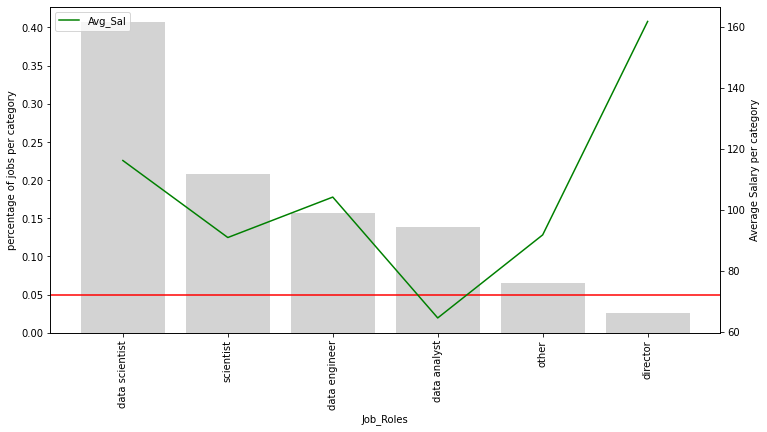

In [174]:
plot_categories(temp_df, 'Job_Roles')

In [179]:
cat_cols = ['Rating', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'per_hour', 'emp_provided', 'comp_age', 'job_state', 
            'HQ_job', 'python', 'sql', 'tf', 'ml','aws', 'excel', 'spark', 'stat', 'tableau', 'Job_Roles', 'seniority','num_comp']

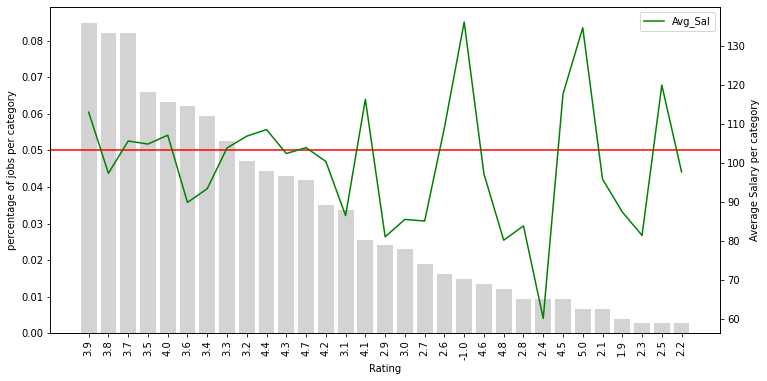

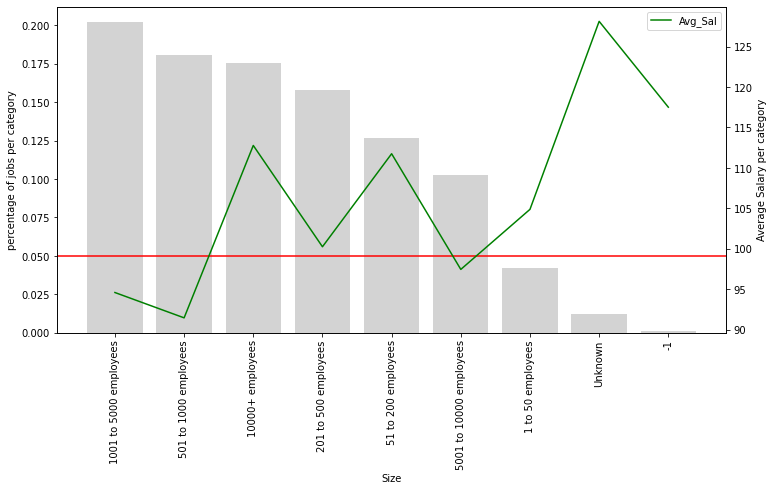

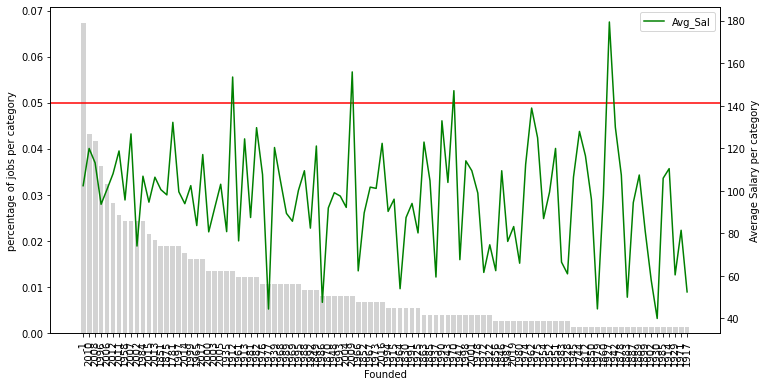

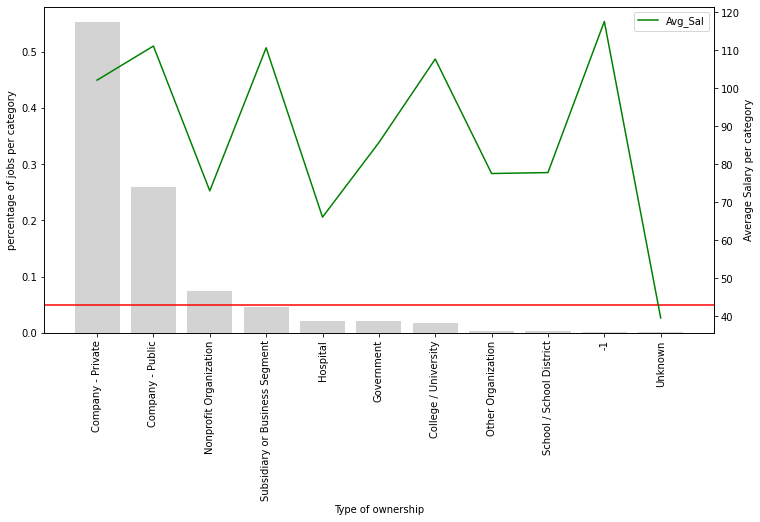

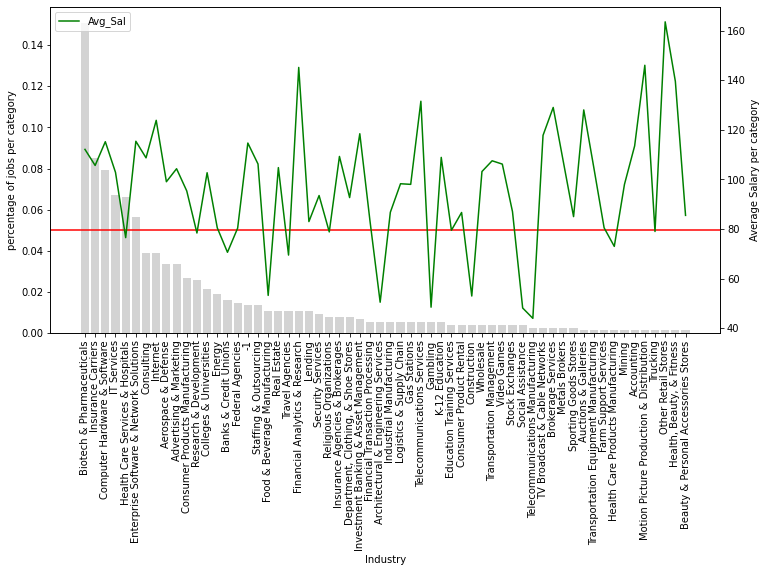

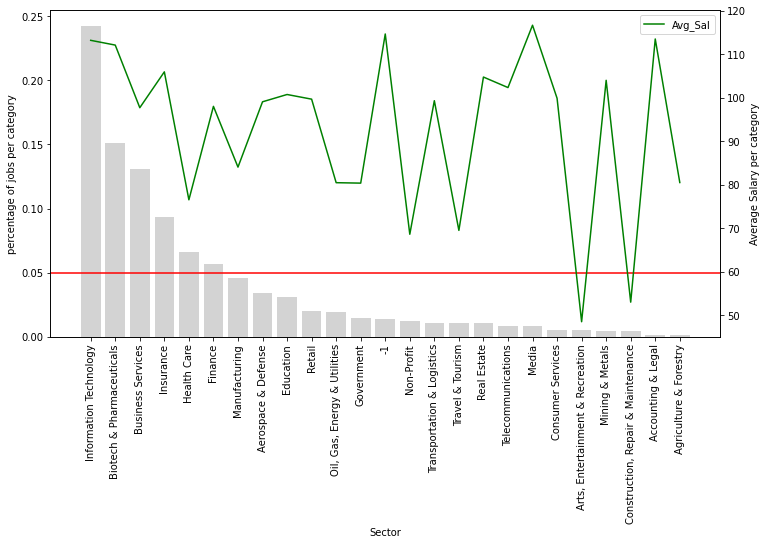

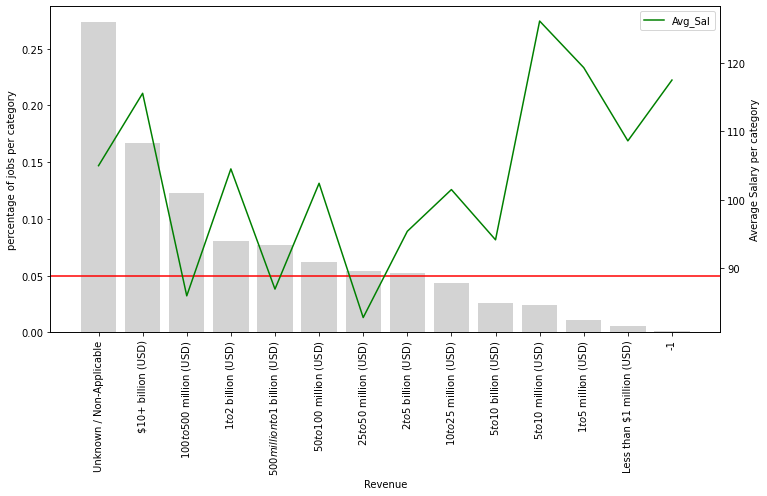

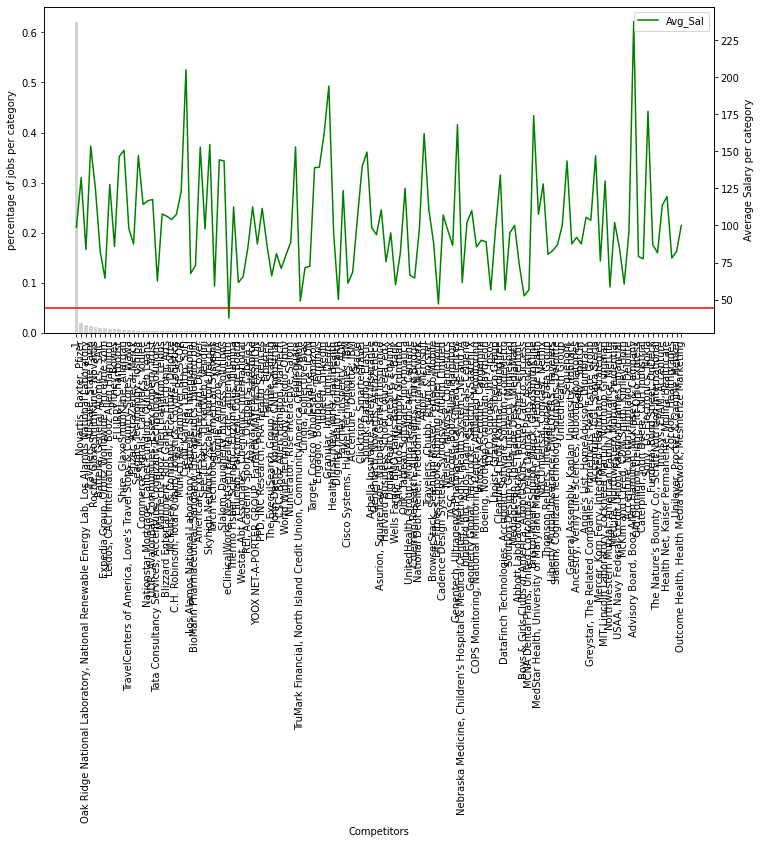

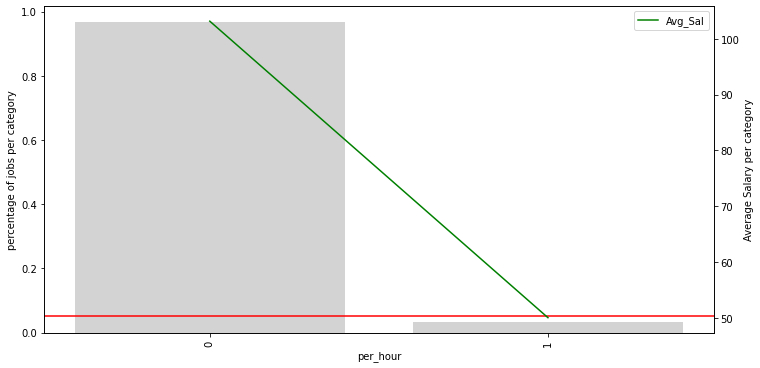

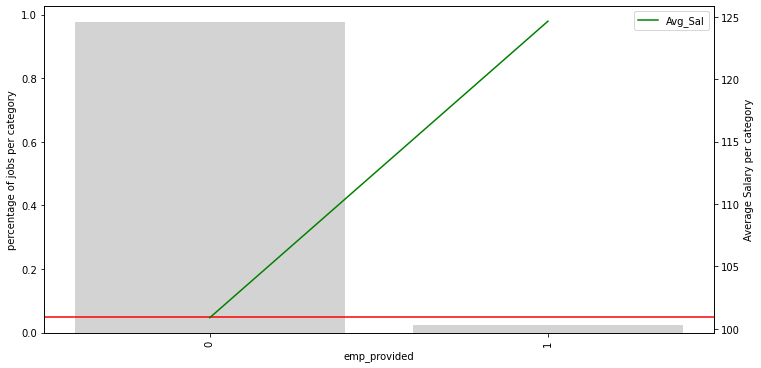

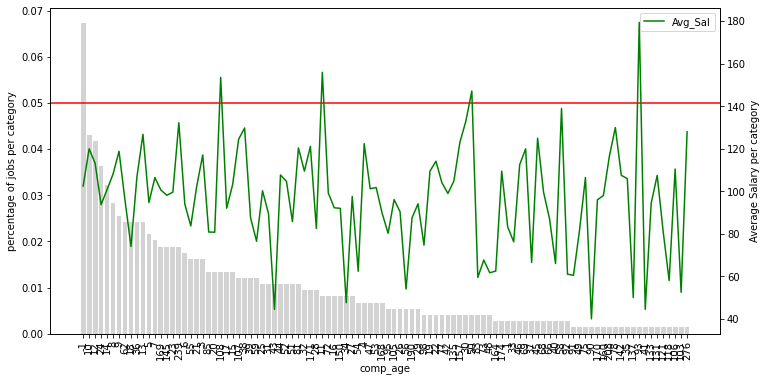

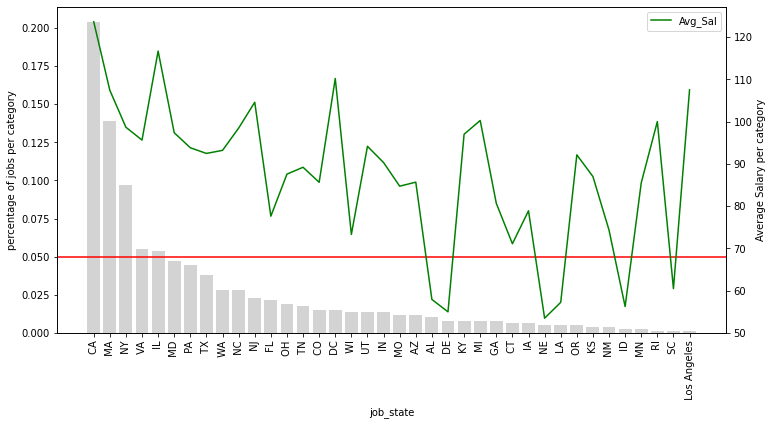

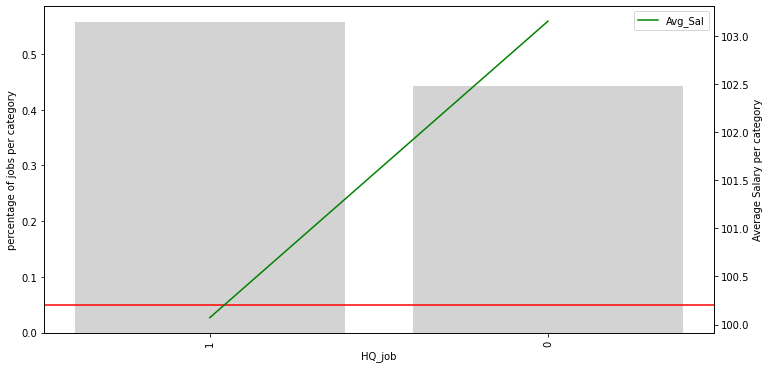

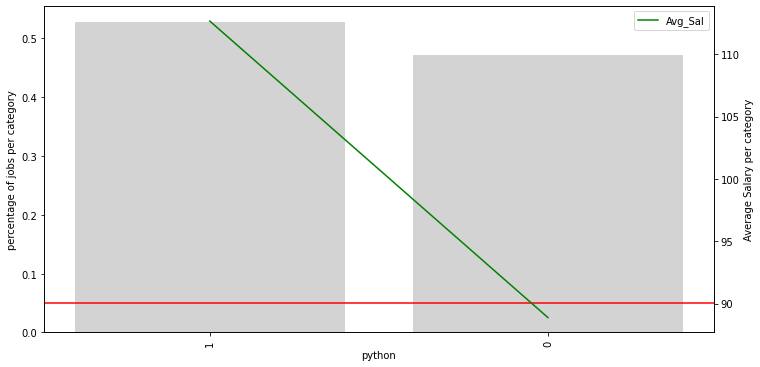

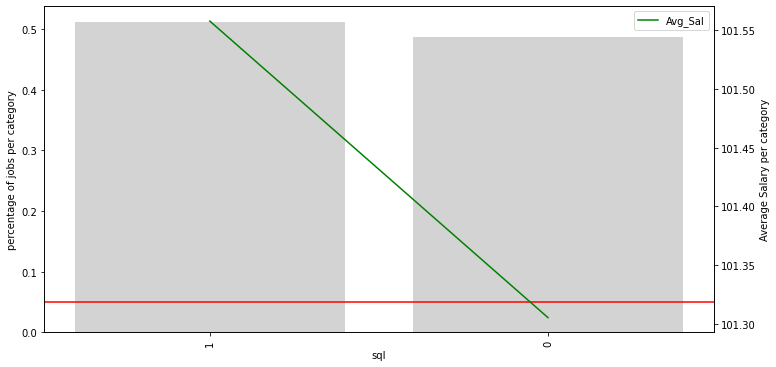

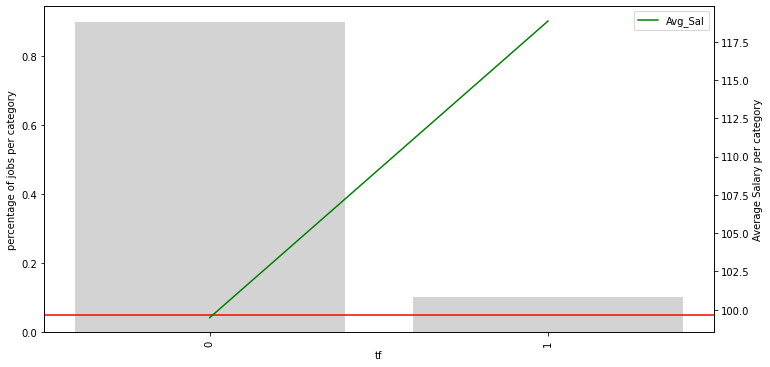

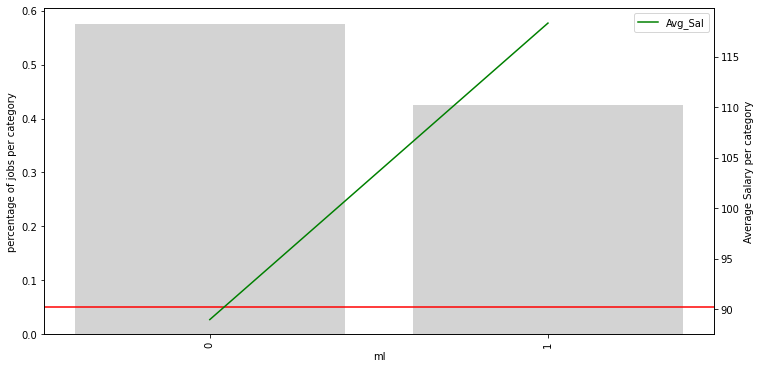

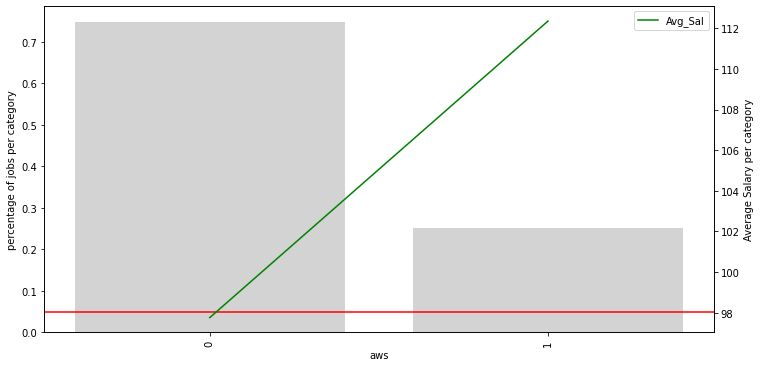

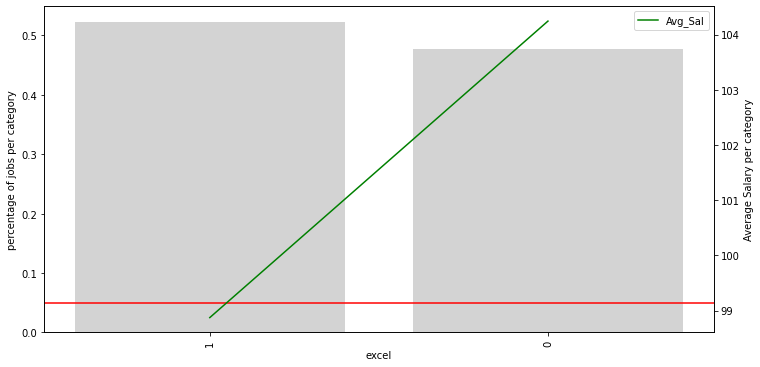

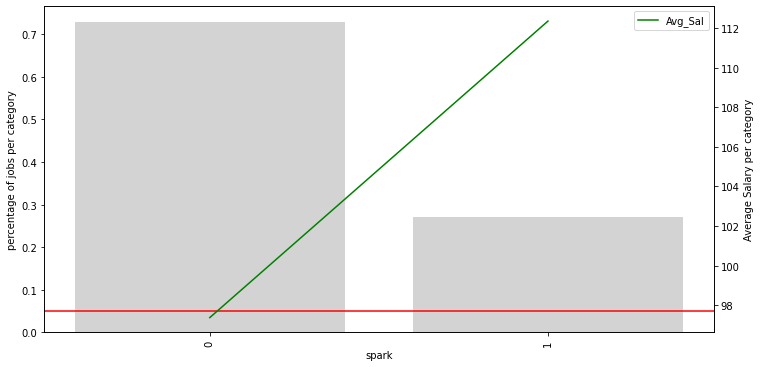

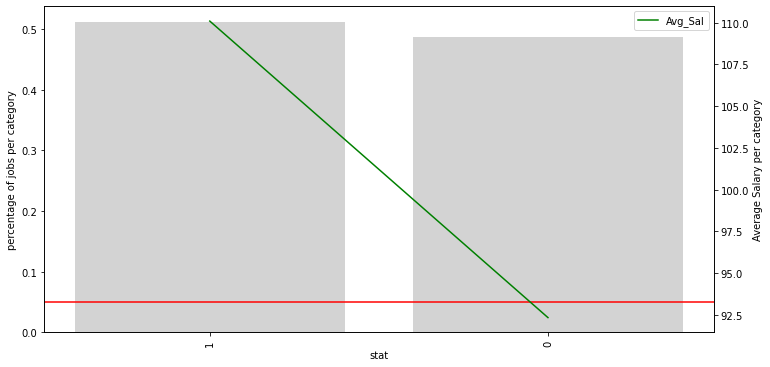

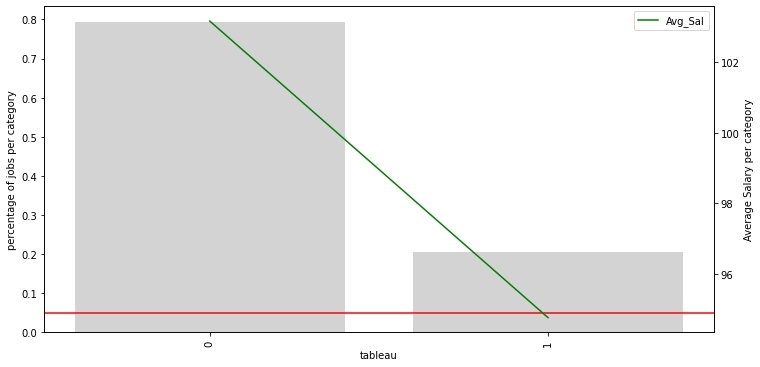

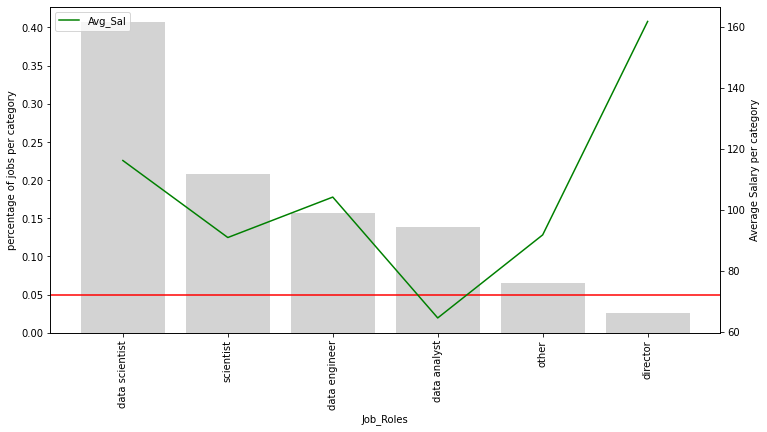

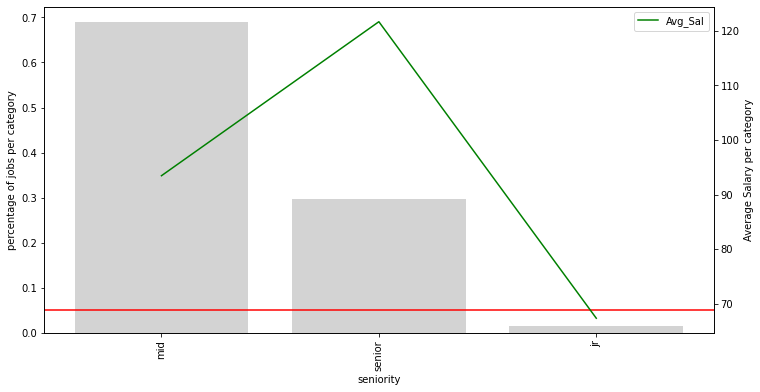

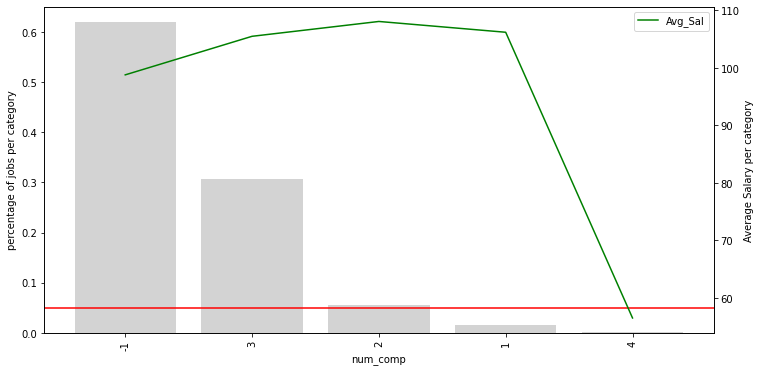

In [180]:
for col in cat_cols:
    temp_df = calculate_avg_salary_per_category(df, col)
    plot_categories(temp_df, col)

### Catergorical Encoding is required to obtain monotonic relationship between varibales and target
### Many categories account for less than 5% of jobs, these could be treated as 'rare' categories

In [182]:
pd.pivot_table(df, index = ['Job_Roles','seniority'], values = 'avg_sal')

avg_sal
Job_Roles      seniority            
data analyst   jr          53.833333
               mid         61.000000
               senior      76.519231
data engineer  mid         94.506329
               senior     124.689189
data scientist jr          83.500000
               mid        107.076142
               senior     135.590000
director       mid        161.736842
other          mid         89.877778
               senior     119.666667
scientist      mid         77.445000
               senior     115.740741

In [188]:
df.drop(['min_sal','max_sal'],axis=1).corr()

,Rating,Founded,per_hour,emp_provided,avg_sal,comp_age,HQ_job,python,sql,ml,stat,excel,aws,spark,tableau,tf,num_comp,len_descp
Rating,1.000000,0.332927,-0.019531,-0.468234,0.012517,0.021655,0.085033,0.144665,0.134463,0.141520,0.052971,-0.036466,0.127826,0.170844,0.001303,0.084794,0.029902,-0.012281
Founded,0.332927,1.000000,0.049313,-0.312761,-0.009947,0.134682,0.171512,0.103183,0.052368,0.077013,0.049665,-0.035567,-0.001062,0.082250,0.064078,0.045285,0.192584,0.083119
per_hour,-0.019531,0.049313,1.000000,0.124748,-0.250626,0.007626,-0.067351,-0.193487,-0.187319,-0.157031,-0.111118,-0.099897,-0.035943,-0.111440,-0.055523,-0.061307,-0.116440,-0.073194
emp_provided,-0.468234,-0.312761,0.124748,1.000000,0.094734,-0.109288,-0.081349,-0.107924,-0.138869,-0.076850,-0.066787,0.074129,-0.005900,-0.093337,-0.011252,-0.051348,-0.118117,-0.102218
avg_sal,0.012517,-0.009947,-0.250626,0.094734,1.000000,0.021996,-0.040823,0.316423,0.003366,0.386796,0.236584,-0.071492,0.168952,0.177254,-0.090646,0.155672,0.085393,0.070474
comp_age,0.021655,0.134682,0.007626,-0.109288,0.021996,1.000000,-0.166680,-0.099160,-0.118290,-0.073230,-0.093306,0.039033,-0.036771,-0.127802,-0.052223,-0.073158,0.120644,0.163911
HQ_job,0.085033,0.171512,-0.067351,-0.081349,-0.040823,-0.166680,1.000000,0.006975,0.130179,0.039779,0.048744,0.106026,-0.070859,-0.068073,0.051202,-0.025625,-0.097309,0.062387
python,0.144665,0.103183,-0.193487,-0.107924,0.316423,-0.099160,0.006975,1.000000,0.373999,0.467471,0.298384,-0.021519,0.200271,0.351191,0.167959,0.218333,0.097137,0.019143
sql,0.134463,0.052368,-0.187319,-0.138869,0.003366,-0.118290,0.130179,0.373999,1.000000,0.129168,0.185505,0.109548,0.125639,0.321918,0.390823,0.041059,0.063952,0.024151
ml,0.141520,0.077013,-0.157031,-0.076850,0.386796,-0.073230,0.039779,0.467471,0.129168,1.000000,0.363730,-0.031209,0.142013,0.335417,-0.040119,0.354232,0.053245,0.115589


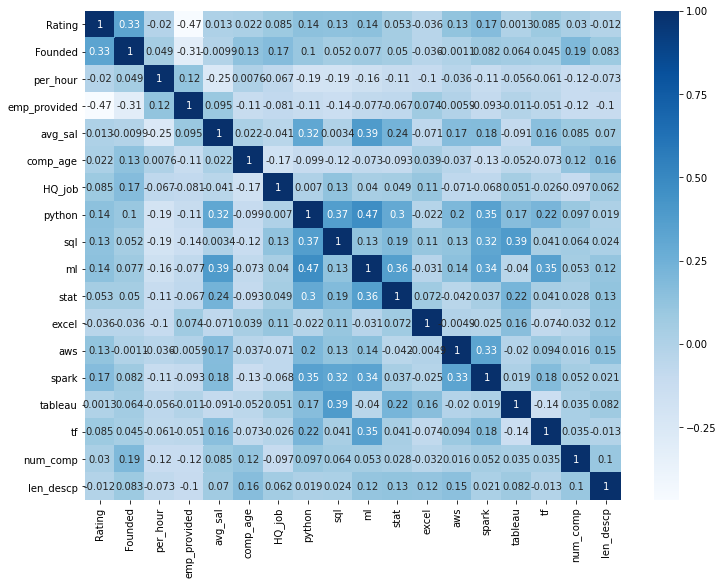

In [193]:
plt.figure(figsize=(12,9))
sns.heatmap(df.drop(['min_sal','max_sal'],axis=1).corr(),cmap='Blues',annot=True)

# PART D. FEATURE ENGINEERING

## Encoding Categorical Features

### Applying mean encoding 

In [15]:
def find_category_mappings(df, variable, target):
    
    return df.groupby([variable])[target].mean().to_dict()


def integer_encode(df, variable, ordinal_mapping):

    df[variable+'_enc'] = df[variable].map(ordinal_mapping)

In [16]:
cols_to_enc = ['Rating', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'comp_age', 'job_state', 
            'Job_Roles', 'seniority','num_comp']

In [17]:
for variable in cols_to_enc:
    mappings = find_category_mappings(df, variable, 'avg_sal')
    integer_encode(df, variable, mappings)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 49 columns):
Job Title                742 non-null object
Salary Estimate          742 non-null object
Job Description          742 non-null object
Rating                   742 non-null float64
Company Name             742 non-null object
Location                 742 non-null object
Headquarters             742 non-null object
Size                     742 non-null object
Founded                  742 non-null int64
Type of ownership        742 non-null object
Industry                 742 non-null object
Sector                   742 non-null object
Revenue                  742 non-null object
Competitors              742 non-null object
per_hour                 742 non-null int64
emp_provided             742 non-null int64
min_sal                  742 non-null int64
max_sal                  742 non-null int64
avg_sal                  742 non-null float64
comp_age                 742 non-null int64

In [19]:
df.to_csv('data_science_jobs_final.csv')

# PART E. MODEL BUILDING

## Creating dataframe for model and performing train_test_split

In [20]:
cols_for_model=['per_hour', 'emp_provided', 'avg_sal', 'HQ_job', 'python', 'sql', 'ml', 'stat','excel', 'aws', 'spark', 'tableau', 'tf', 'len_descp', 
                'Rating_enc', 'Size_enc', 'Founded_enc', 'Type of ownership_enc', 'Industry_enc', 'Sector_enc', 'Revenue_enc','Competitors_enc', 
                'comp_age_enc', 'job_state_enc', 'Job_Roles_enc','seniority_enc', 'num_comp_enc']

In [21]:
data=pd.DataFrame(df,columns=cols_for_model)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 27 columns):
per_hour                 742 non-null int64
emp_provided             742 non-null int64
avg_sal                  742 non-null float64
HQ_job                   742 non-null int64
python                   742 non-null int64
sql                      742 non-null int64
ml                       742 non-null int64
stat                     742 non-null int64
excel                    742 non-null int64
aws                      742 non-null int64
spark                    742 non-null int64
tableau                  742 non-null int64
tf                       742 non-null int64
len_descp                742 non-null int64
Rating_enc               742 non-null float64
Size_enc                 742 non-null float64
Founded_enc              742 non-null float64
Type of ownership_enc    742 non-null float64
Industry_enc             742 non-null float64
Sector_enc               742 non-null float64
R

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = data.drop('avg_sal', axis =1)
y = data['avg_sal'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 1. Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [268]:
cross_val_score(lm,X_train,y_train, scoring = 'r2', cv= 3)

array([0.66236283, 0.60211146, 0.66743184])

In [269]:
cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)

array([-16.36323143, -18.49927218, -17.39072938])

## 2. Lasso Regression

In [45]:
from sklearn.linear_model import Lasso

In [46]:
lasso = Lasso()

In [47]:
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [275]:
cross_val_score(lasso,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)

array([-15.82390494, -18.00410779, -17.32159497])

In [277]:
np.mean(cross_val_score(lasso,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-17.049869233825838

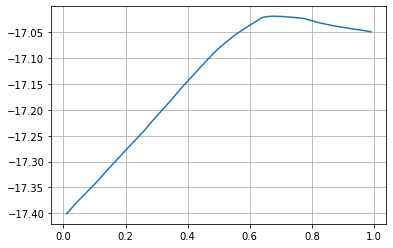

In [285]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    las = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(las,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)
plt.grid(True)

In [278]:
lasso = Lasso(alpha=0.65)

In [279]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.65, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [280]:
cross_val_score(lasso,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)

array([-15.81597907, -17.9778314 , -17.26855716])

In [281]:
np.mean(cross_val_score(lasso,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-17.0207892088044

## 3. Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50)

In [33]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-13.070445657932966

## Performing Grid Search

In [34]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators':range(10,100,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [35]:
gs = RandomizedSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)

In [36]:
gs.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=50, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=None,

In [37]:
gs.best_score_

-12.787460183623757

In [38]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
gs.best_params_

{'n_estimators': 90, 'max_features': 'auto', 'criterion': 'mae'}

## Generating predictions

In [48]:
y_lm = lm.predict(X_test)
y_lasso = lasso.predict(X_test)
y_rf = gs.best_estimator_.predict(X_test)

In [42]:
y_rf

array([ 86.07222222, 108.51111111, 137.38888889, 120.88888889,
       114.26111111,  91.93333333, 101.06111111,  99.575     ,
       123.5       ,  94.42777778,  53.28888889,  93.45277778,
        65.53333333,  59.50555556, 153.91666667,  99.55555556,
       106.50833333,  98.01666667, 163.28888889, 160.03888889,
        63.53333333,  54.02777778,  93.45277778, 164.69444444,
       107.08055556,  83.12777778,  63.91666667, 128.53888889,
        72.34444444, 196.12222222, 124.92777778, 175.19444444,
       134.59444444,  69.37777778,  54.3       ,  94.31666667,
        54.75      , 109.78888889, 162.78333333, 120.21944444,
        69.83333333,  71.87222222,  97.42222222, 119.48888889,
        94.08333333,  75.15      , 104.28055556, 112.56666667,
        78.03888889, 107.72222222,  93.26111111, 153.74444444,
       199.63888889,  69.37777778, 110.70277778, 100.78333333,
        89.76666667,  54.02777778,  94.20555556,  94.2       ,
        54.75      , 109.16388889,  52.71111111, 100.61

In [43]:
y_test

array([ 84. , 110.5, 139. , 122.5, 110.5,  85. ,  90. ,  96. ,  92.5,
        87.5,  50. ,  73.5,  61.5,  59.5,  98.5, 100.5, 110. ,  87. ,
        63.5, 153. ,  62.5,  52.5,  73.5, 136.5,  95.5, 107.5,  69.5,
       139. ,  74.5, 225. , 127.5, 181. , 179.5,  61. ,  49. ,  80.5,
        55. , 124. , 173. , 111. ,  72.5,  62.5,  84. , 113.5,  95.5,
        70.5, 109. ,  96.5, 100. , 100. ,  96. , 130. , 205. ,  61. ,
       107. , 107.5,  95. ,  52.5,  15.5,  90. ,  55. , 108. ,  61.5,
       107. , 100.5,  87.5, 124. ,  87. ,  68.5,  76.5, 102.5, 142. ,
        87.5,  81. ,  54. , 101. ,  90. , 120. , 107. ,  76. ,  64.5,
        48.5, 107.5, 154.5, 140. ,  66. ,  65.5, 125. , 150.5,  89. ,
       111.5,  92. ,  70.5, 115. , 121. ,  81. , 136.5,  93.5, 106.5,
        79.5,  50. , 143.5,  76.5,  45.5, 124.5, 140. , 114.5,  68. ,
       123.5,  75.5,  98. ,  74. ,  60. , 105.5,  84.5, 118.5, 100. ,
       106.5,  70.5, 172. ,  81.5,  44. , 155. , 109. ,  84. , 124. ,
       100.5, 142.5,

In [49]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_lm))
print(mean_absolute_error(y_test,y_lasso))
print(mean_absolute_error(y_test,y_rf))

16.190169578245953
15.835833296182452
10.334414615958242


In [50]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_lm))
print(r2_score(y_test,y_lasso))
print(r2_score(y_test,y_rf))

0.6116317851855773
0.6224270098444755
0.7422921702254631


In [51]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [52]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [65]:
model.predict(X_test[1,:].reshape(1,-1))

array([108.51111111])

In [67]:
y_test[1]

110.5